# 1. Perkenalan 

1.1 \
Nama : Faiz Kurniawan \
Batch : RMT 018 \
\
1.2 \
Latar Belakang
<p style='text-align: justify;'> Covid-19 adalah penyakit menular yang disebabkan oleh virus SARS-CoV-2. Kebanyakan korban terjangkit akan mengalami gangguan pernafasan, dan akan sembuh tanpa penanganan intensif. Namun beberapa korban terjangkit yang memiliki penyakit bawaan seperti gangguan pernafasan, diabetes, atau kanker memiliki kemungkinan besar untuk mengalami sebuah komplikasi yang bisa berujung pada kematian. Cara terbaik mencegah dan menangani Covid-19 adalah dengan mengetahui bagaimana virus menyebar dan melindungi diri dari korban terjangkit lainnya, dan juga melakukan isolasi untuk mencegah terjadinya persebaran lebih lanjut.
 </p>



1.3 \
Problem Statement
<p style='text-align: justify;'> Berdasarkan latar belakang yang ada, peneliti ingin mengetahui data lebih lanjut mengenai Covid-19 di berbagai negara. Data-data seperti jumlah terjangkit, jumlah meninggal, persentase jumlah korban terjangkit,
dan persentase jumlah meninggal. </p>






# 2. Import Pustaka 

In [65]:
import pandas as pd

# 3. Data Loading

In [66]:
# Import dataset ke variable df
# Query yang digunakan di GCP adalah :
# SELECT country_region, confirmed, deaths FROM `bigquery-public-data.covid19_jhu_csse.summary`
df = pd.read_csv("h8dsft_P0GC1_faiz_kurniawan.csv")

In [67]:
# Menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170383 entries, 0 to 170382
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  170383 non-null  object
 1   confirmed       170383 non-null  int64 
 2   deaths          170383 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ MB


In [68]:
# Menampilkan deskripsi dari dataset
df.describe()

,confirmed,deaths
count,1.703830e+05,170383.000000
mean,1.236532e+05,1743.915344
std,7.534946e+05,8306.507247
min,0.000000e+00,34.000000
25%,4.525000e+03,75.000000
50%,1.100000e+04,161.000000
75%,4.327900e+04,607.000000
max,3.849501e+07,183898.000000


In [69]:
# Menampilkan 5 data teratas dari dataset
df.head()

,country_region,confirmed,deaths
0,US,6010,86
1,US,3870,93
2,US,2566,102
3,US,17250,294
4,US,3983,80


In [70]:
# Menampilkan 5 data terbawah dari dataset
df.tail()

,country_region,confirmed,deaths
170378,Moldova,518793,11537
170379,Mongolia,925073,2179
170380,Namibia,166363,4038
170381,Nepal,979140,11952
170382,Netherlands,37034,213


In [105]:
# Menampilkan data acak dari dataset
df.sample()

,country_region,confirmed,deaths
96954,US,53859,665


In [72]:
# Menampilkan jumlah data kosong masing-masing kolom dari dataset 
df.isnull().sum()

country_region    0
confirmed         0
deaths            0
dtype: int64

# 4. Data Cleaning

In [117]:
# Pembuatan variable baru hanya dengan kolom yang diperlukan saja dari dataset utama
# Grouping variabel baru di kolom country_region untuk mendapatkan data total alih-alih harian
# Penjumlahan value confirmed dan deaths
temporary = df[['country_region', 'confirmed', 'deaths']].groupby('country_region').sum()

# Pembuatan kolom baru yakni persentase meninggal
temporary['Persen'] = temporary['deaths'] / temporary['confirmed'] * 100

# Pembuatan variabel baru dan juga pencarian dan penghapusan data yang salah dimana deaths lebih banyak dari confirmed
covid_19 = temporary[temporary['deaths'] < temporary['confirmed']]

# Penggantian nama kolom dan axis menjadi Bahasa Indonesia
covid_19.rename_axis("Negara", inplace=True)
covid_19.rename(columns={"confirmed" : "Terjangkit", "deaths": "Meninggal"}, inplace=True)


covid_19


,Terjangkit,Meninggal,Persen
Negara,,,
Afghanistan,8954049,378550,4.227696
Albania,11658587,161143,1.382183
Algeria,10694235,286727,2.681136
Andorra,1702511,8534,0.501260
Angola,5004997,100150,2.001000
...,...,...,...
Vietnam,324589756,1604636,0.494358
West Bank and Gaza,33776863,308106,0.912181
Yemen,532976,100769,18.906855


# 5. Eksplorasi Data

In [74]:
# Menampilkan jumlah korban terjangkit di semua negara
total_confirmed = int(covid_19['confirmed'].sum())
print('Jumlah korban terjangkit di semua negara adalah : ', total_confirmed)

# Menampilkan jumlah korban meninggal di semua negara
total_deaths =int(covid_19['deaths'].sum())
print('Jumlah korban meninggal di semua negara adalah : ', total_deaths)

# Menampilkan persentase jumlah korban meninggal di semua negara
total_deaths_percentage =float(total_deaths / total_confirmed * 100)

# Menampilkan hanya 2 angka di belakang koma
total_deaths_percentage = round(total_deaths_percentage, 2)
print('Persentase jumlah korban meninggal adalah : ', total_deaths_percentage)

Jumlah korban terjangkit di semua negara adalah :  21068411289
Jumlah korban meninggal di semua negara adalah :  297133528
Persentase jumlah korban meninggal adalah :  1.41


In [75]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban terjangkit terbesar
highest_confirmed = covid_19.sort_values(['confirmed'], ascending=False).head()
highest_confirmed

,confirmed,deaths,percentage
country_region,,,
US,3484238268,46947278,1.347419
India,2069388540,26336681,1.272679
Brazil,1441326608,33680212,2.336751
France,1101284102,7654579,0.695059
Germany,894782753,6404085,0.715714


In [76]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban terjangkit terkecil
lowest_confirmed = covid_19.sort_values(['confirmed'], ascending=True).head()
lowest_confirmed

,confirmed,deaths,percentage
country_region,,,
South Korea,5621,35,0.622665
Mainland China,153212,5338,3.484061
Saint Kitts and Nevis,161336,1162,0.720236
Micronesia,177624,452,0.254470
Sao Tome and Principe,211031,2708,1.283224


In [77]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban meninggal terbesar
highest_deaths = covid_19.sort_values(['deaths'], ascending=False).head()
highest_deaths

,confirmed,deaths,percentage
country_region,,,
US,3484238268,46947278,1.347419
Brazil,1441326608,33680212,2.336751
India,2069388540,26336681,1.272679
Mexico,273620777,17019135,6.219972
Russia,713308460,15123963,2.120256


In [78]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban meninggal terkecil
lowest_deaths = covid_19.sort_values(['deaths'], ascending=True).head()
lowest_deaths

,confirmed,deaths,percentage
country_region,,,
South Korea,5621,35,0.622665
Micronesia,177624,452,0.254470
Saint Kitts and Nevis,161336,1162,0.720236
Dominica,456622,2270,0.497129
Monaco,492190,2315,0.470347


In [79]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan persentase meninggal terbesar
highest_percentage = covid_19.sort_values(['percentage'], ascending=False).head()
highest_percentage

,confirmed,deaths,percentage
country_region,,,
Belgium,3604651,1648828,45.741682
Yemen,532976,100769,18.906855
Sudan,2875674,213540,7.425737
Mexico,273620777,17019135,6.219972
Syria,2412805,143246,5.936907


In [80]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan persentase meninggal terkecil
lowest_percentage = covid_19.sort_values(['percentage'], ascending=True).head()
lowest_percentage

,confirmed,deaths,percentage
country_region,,,
Iceland,4540873,4153,0.091458
Singapore,50223359,48604,0.096776
New Zealand,38649762,40894,0.105807
Brunei,4481523,5551,0.123864
"Korea, South",603543671,799646,0.132492


In [81]:
# Import matplotlib
%matplotlib inline

<AxesSubplot: title={'center': '5 negara  paling banyak terjangkit'}, xlabel='country_region'>

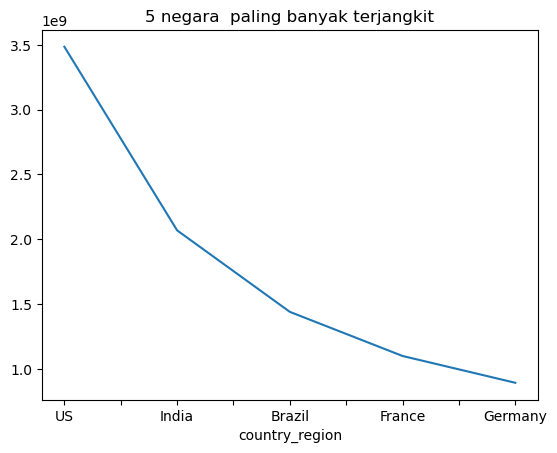

In [82]:
# Visualisasi 5 negara dengan jumlah korban terjangkit terbesar
highest_confirmed['confirmed'].plot(title= '5 negara  paling banyak terjangkit')


<AxesSubplot: title={'center': '5 negara paling sedikit terjangkit'}, xlabel='country_region'>

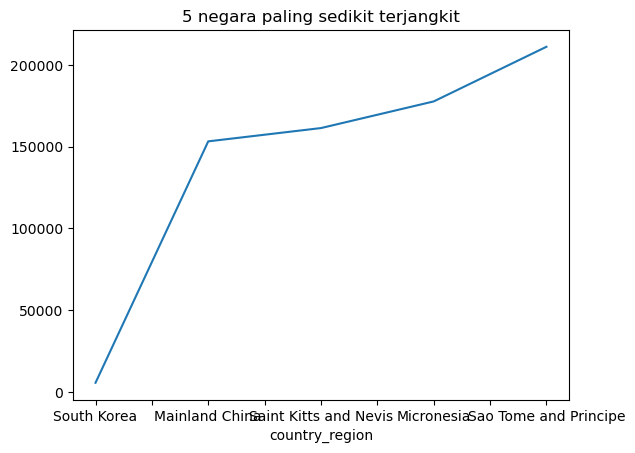

In [83]:
# Visualisasi 5 negara dengan jumlah korban terjangkit terkecil
lowest_confirmed['confirmed'].plot(title='5 negara paling sedikit terjangkit')

<AxesSubplot: title={'center': '5 negara paling banyak meninggal'}, xlabel='country_region'>

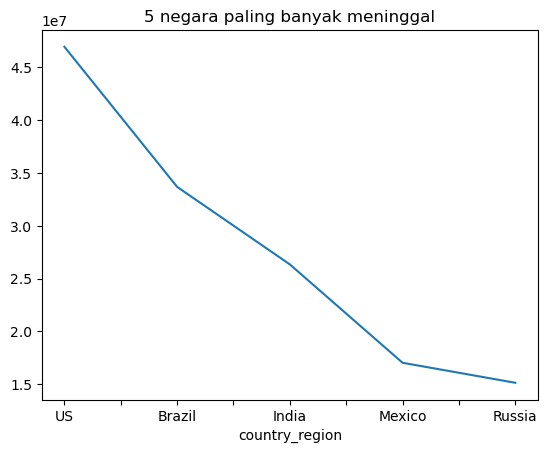

In [84]:
# Visualisasi 5 negara dengan jumlah korban meninggal terbesar
highest_deaths['deaths'].plot(title='5 negara paling banyak meninggal')

<AxesSubplot: title={'center': '5 negara paling sedikit meninggal'}, xlabel='country_region'>

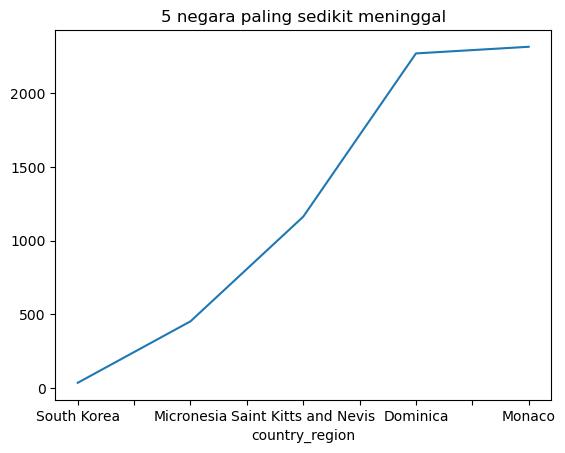

In [85]:
# Visualisasi 5 negara dengan jumlah korban meninggal terkecil
lowest_deaths['deaths'].plot(title= '5 negara paling sedikit meninggal')

<AxesSubplot: title={'center': '5 negara paling banyak persentase meninggal'}, xlabel='country_region'>

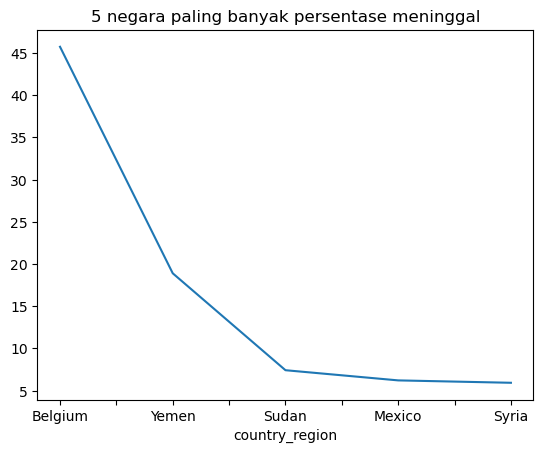

In [86]:
# Visualisasi 5 negara dengan persentase meninggal terbesar
highest_percentage['percentage'].plot(title='5 negara paling banyak persentase meninggal')

<AxesSubplot: title={'center': '5 negara paling sedikit persentase meninggal'}, xlabel='country_region'>

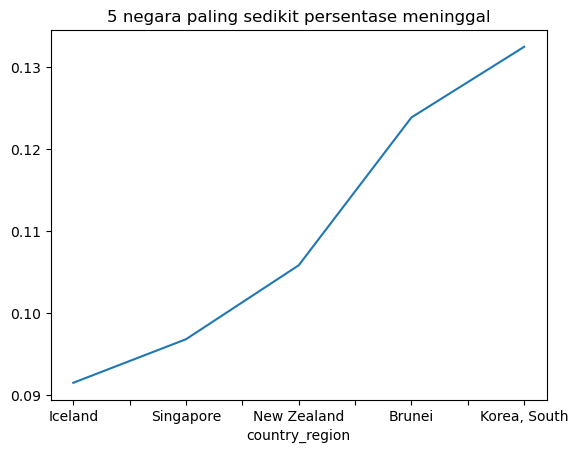

In [87]:
# Visualisasi 5 negara dengan persentase meninggal terkecil
lowest_percentage['percentage'].plot(title='5 negara paling sedikit persentase meninggal')

# 6. Pengambilan Kesimpulan

Berdasarkan data yang ada, maka bisa disimpulkan bahwa :

1 . Jumlah korban terjangkit di semua negara adalah :

In [88]:
total_confirmed

21068411289

2 . Jumlah korban meninggal di semua negara adalah :

In [89]:
total_deaths

297133528

3 . Persentase jumlah korban meninggal di semua negara adalah :

In [90]:
total_deaths_percentage

1.41

4 . 5 Negara dengan jumlah terjangkit terbesar adalah :

In [91]:
highest_confirmed.index

Index(['US', 'India', 'Brazil', 'France', 'Germany'], dtype='object', name='country_region')

5 . 5 negara dengan jumlah terjangkit terkecil adalah :

In [92]:
lowest_confirmed.index

Index(['South Korea', 'Mainland China', 'Saint Kitts and Nevis', 'Micronesia',
       'Sao Tome and Principe'],
      dtype='object', name='country_region')

6 . 5 negara dengan jumlah kematian terbesar adalah :

In [93]:
highest_deaths.index

Index(['US', 'Brazil', 'India', 'Mexico', 'Russia'], dtype='object', name='country_region')

7 . 5 negara dengan jumlah kematian terkecil adalah :

In [94]:
lowest_deaths.index

Index(['South Korea', 'Micronesia', 'Saint Kitts and Nevis', 'Dominica',
       'Monaco'],
      dtype='object', name='country_region')

8 . 5 Negara dengan persentase meninggal terbesar adalah :

In [95]:
highest_percentage.index

Index(['Belgium', 'Yemen', 'Sudan', 'Mexico', 'Syria'], dtype='object', name='country_region')

9 . 5 Negara dengan persentase meninggal terkecil adalah :

In [96]:
lowest_percentage.index

Index(['Iceland', 'Singapore', 'New Zealand', 'Brunei', 'Korea, South'], dtype='object', name='country_region')